In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV


In [7]:
df = pd.read_csv("users_with_shipments.csv")

In [8]:
df['fraud_type'] = df['fraud_type'].fillna("No")

In [9]:
print(df.head())
print(df.info())
print(df['fraud_type'].value_counts())

               uuid username               email locale  is_fraud fraud_type  \
0  hfov7wg50qxw4fbc   user_0  mary96@example.net     US         0         No   
1  hfov7wg50qxw4fbc   user_0  mary96@example.net     US         0         No   
2  hfov7wg50qxw4fbc   user_0  mary96@example.net     US         0         No   
3  hfov7wg50qxw4fbc   user_0  mary96@example.net     US         0         No   
4  201j4nin14iiqbzl   user_1  hpatel@example.net     US         0         No   

    ship_date ship_time              shipFrom_addressLine shipFrom_city  \
0  2025-07-09  19:19:06          1461 Emily Pine Apt. 122     Smithbury   
1  2025-07-02  17:20:17          1461 Emily Pine Apt. 122     Smithbury   
2  2025-06-22  20:34:13          1461 Emily Pine Apt. 122     Smithbury   
3  2025-07-01  04:41:26          1461 Emily Pine Apt. 122     Smithbury   
4  2025-07-10  01:27:13  63975 Patterson Ridges Suite 214  East Katelyn   

  shipFrom_stateCode  shipFrom_postalCode shipFrom_countryCode  \
0 

In [10]:
print(df['is_fraud'].value_counts())

is_fraud
0    76453
1     3820
Name: count, dtype: int64


In [11]:
print(df.describe())

           is_fraud  shipFrom_postalCode  shipTo_postalCode  \
count  80273.000000         80273.000000       80273.000000   
mean       0.047588         50133.670574       50124.950058   
std        0.212893         28743.878699       28764.677419   
min        0.000000           510.000000         501.000000   
25%        0.000000         25143.000000       25053.000000   
50%        0.000000         50087.000000       50196.000000   
75%        0.000000         75167.000000       75020.000000   
max        1.000000         99949.000000       99948.000000   

       payment_accountNumber  
count           8.027300e+04  
mean            3.761574e+17  
std             1.242266e+18  
min             6.040023e+10  
25%             3.887813e+13  
50%             3.511923e+15  
75%             4.631405e+15  
max             4.998338e+18  


In [12]:
print(df['fraud_type'].value_counts())

fraud_type
No    76453
PF     1359
UA     1268
CC     1193
Name: count, dtype: int64


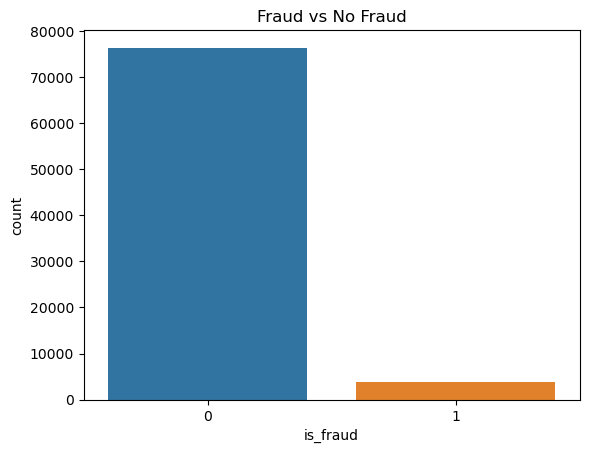

In [16]:
sns.countplot(x='is_fraud', data=df)
plt.title("Fraud vs No Fraud")
plt.show()

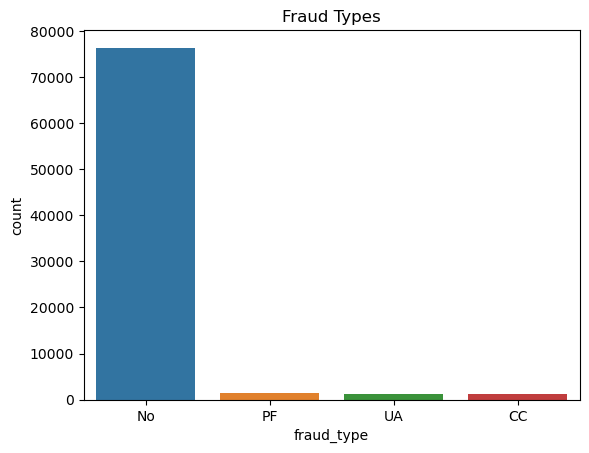

In [17]:
sns.countplot(x='fraud_type', data=df, order=df['fraud_type'].value_counts().index)
plt.title("Fraud Types")
plt.show()

In [27]:
print(df.head())

               uuid username               email locale  is_fraud fraud_type  \
0  hfov7wg50qxw4fbc   user_0  mary96@example.net     US         0         No   
1  hfov7wg50qxw4fbc   user_0  mary96@example.net     US         0         No   
2  hfov7wg50qxw4fbc   user_0  mary96@example.net     US         0         No   
3  hfov7wg50qxw4fbc   user_0  mary96@example.net     US         0         No   
4  201j4nin14iiqbzl   user_1  hpatel@example.net     US         0         No   

    ship_date ship_time              shipFrom_addressLine shipFrom_city  ...  \
0  2025-07-09  19:19:06          1461 Emily Pine Apt. 122     Smithbury  ...   
1  2025-07-02  17:20:17          1461 Emily Pine Apt. 122     Smithbury  ...   
2  2025-06-22  20:34:13          1461 Emily Pine Apt. 122     Smithbury  ...   
3  2025-07-01  04:41:26          1461 Emily Pine Apt. 122     Smithbury  ...   
4  2025-07-10  01:27:13  63975 Patterson Ridges Suite 214  East Katelyn  ...   

  shipFrom_postalCode  shipFrom_countr

In [24]:
df['shipFrom_differs_from_locale'] = (df['shipFrom_countryCode'] != df['locale']).astype(int)

In [26]:
print(df['shipFrom_differs_from_locale'].value_counts())

shipFrom_differs_from_locale
0    79659
1      614
Name: count, dtype: int64


In [28]:
df['is_domestic'] = (df['shipFrom_countryCode'] == df['shipTo_countryCode']).astype(int)

In [29]:
print(df['is_domestic'].value_counts())

is_domestic
1    75613
0     4660
Name: count, dtype: int64


In [30]:
df['shipment_datetime'] = pd.to_datetime(df['ship_date'] + ' ' + df['ship_time'])

In [32]:
df.sort_values(by=['uuid', 'shipment_datetime'], inplace=True)
df['time_delta_minutes'] = df.groupby('uuid')['shipment_datetime'].diff().dt.total_seconds() / 60
df['time_delta_minutes'].fillna(-1, inplace=True)

In [33]:
print(df.head())

                   uuid   username                         email locale  \
37104  0046rkwtn9jc5jwe  user_9238  josephcunningham@example.net     US   
37105  0046rkwtn9jc5jwe  user_9238  josephcunningham@example.net     US   
37103  0046rkwtn9jc5jwe  user_9238  josephcunningham@example.net     US   
37101  0046rkwtn9jc5jwe  user_9238  josephcunningham@example.net     US   
37099  0046rkwtn9jc5jwe  user_9238  josephcunningham@example.net     US   

       is_fraud fraud_type   ship_date ship_time shipFrom_addressLine  \
37104         0         No  2025-06-19  22:08:41        479 Henry Run   
37105         0         No  2025-06-21  14:39:49        479 Henry Run   
37103         0         No  2025-06-22  08:44:17        479 Henry Run   
37101         0         No  2025-06-26  17:28:05        479 Henry Run   
37099         0         No  2025-06-30  00:51:33        479 Henry Run   

      shipFrom_city  ...       shipTo_city  shipTo_stateCode  \
37104   Taylorburgh  ...       Lake Edward    

In [34]:
account_user_counts = df.groupby('payment_accountNumber')['uuid'].transform('nunique')
df['num_users_per_account'] = account_user_counts

In [35]:
print(df.head())

                   uuid   username                         email locale  \
37104  0046rkwtn9jc5jwe  user_9238  josephcunningham@example.net     US   
37105  0046rkwtn9jc5jwe  user_9238  josephcunningham@example.net     US   
37103  0046rkwtn9jc5jwe  user_9238  josephcunningham@example.net     US   
37101  0046rkwtn9jc5jwe  user_9238  josephcunningham@example.net     US   
37099  0046rkwtn9jc5jwe  user_9238  josephcunningham@example.net     US   

       is_fraud fraud_type   ship_date ship_time shipFrom_addressLine  \
37104         0         No  2025-06-19  22:08:41        479 Henry Run   
37105         0         No  2025-06-21  14:39:49        479 Henry Run   
37103         0         No  2025-06-22  08:44:17        479 Henry Run   
37101         0         No  2025-06-26  17:28:05        479 Henry Run   
37099         0         No  2025-06-30  00:51:33        479 Henry Run   

      shipFrom_city  ... shipTo_stateCode  shipTo_postalCode  \
37104   Taylorburgh  ...               PW     

In [39]:
cat_cols = ['locale', 'shipFrom_countryCode', 'shipTo_countryCode', 'fraud_type']

for col in cat_cols:
    le = LabelEncoder()
    df[col + '_enc'] = le.fit_transform(df[col])

In [40]:
df.head()

,uuid,username,email,locale,is_fraud,fraud_type,ship_date,ship_time,shipFrom_addressLine,shipFrom_city,...,payment_addressLine,shipFrom_differs_from_locale,is_domestic,shipment_datetime,time_delta_minutes,num_users_per_account,locale_enc,shipFrom_countryCode_enc,shipTo_countryCode_enc,fraud_type_enc
37104,0046rkwtn9jc5jwe,user_9238,josephcunningham@example.net,US,0,No,2025-06-19,22:08:41,479 Henry Run,Taylorburgh,...,479 Henry Run,0,1,2025-06-19 22:08:41,-1.000000,1,9,9,9,1
37105,0046rkwtn9jc5jwe,user_9238,josephcunningham@example.net,US,0,No,2025-06-21,14:39:49,479 Henry Run,Taylorburgh,...,479 Henry Run,0,1,2025-06-21 14:39:49,2431.133333,1,9,9,9,1
37103,0046rkwtn9jc5jwe,user_9238,josephcunningham@example.net,US,0,No,2025-06-22,08:44:17,479 Henry Run,Taylorburgh,...,479 Henry Run,0,1,2025-06-22 08:44:17,1084.466667,1,9,9,9,1
37101,0046rkwtn9jc5jwe,user_9238,josephcunningham@example.net,US,0,No,2025-06-26,17:28:05,479 Henry Run,Taylorburgh,...,479 Henry Run,0,1,2025-06-26 17:28:05,6283.800000,1,9,9,9,1
37099,0046rkwtn9jc5jwe,user_9238,josephcunningham@example.net,US,0,No,2025-06-30,00:51:33,479 Henry Run,Taylorburgh,...,479 Henry Run,0,1,2025-06-30 00:51:33,4763.466667,1,9,9,9,1


In [41]:
y = df['is_fraud']

In [44]:
feature_cols = [
    'shipFrom_differs_from_locale',
    'is_domestic',
    'time_delta_minutes',
    'num_users_per_account',
    'locale_enc',
    'shipFrom_countryCode_enc',
    'shipTo_countryCode_enc'
]

X = df[feature_cols]


In [45]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [47]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [49]:
y_pred = clf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[15214    77]
 [  165   599]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     15291
           1       0.89      0.78      0.83       764

    accuracy                           0.98     16055
   macro avg       0.94      0.89      0.91     16055
weighted avg       0.98      0.98      0.98     16055



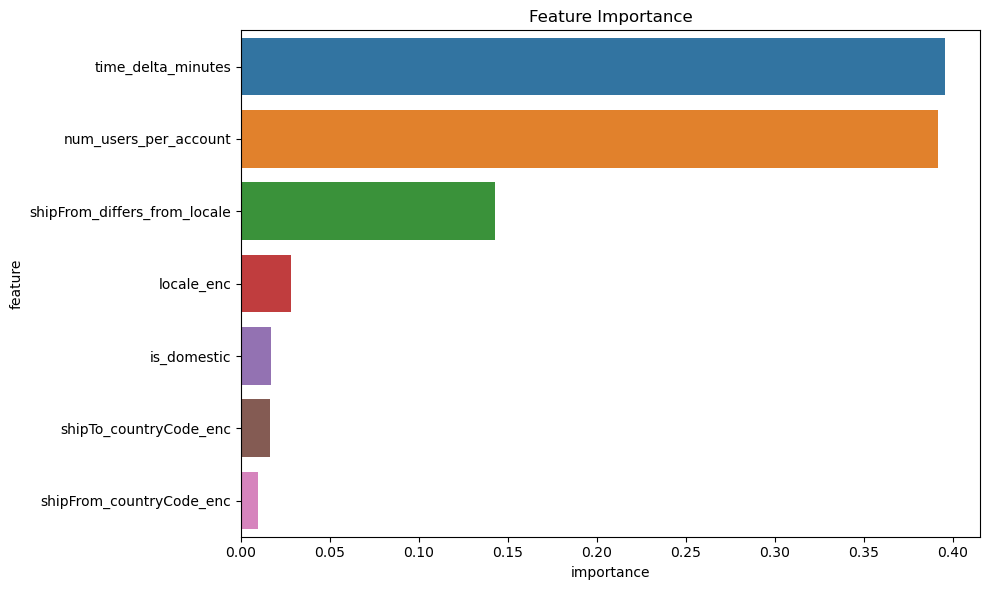

In [50]:
importances = clf.feature_importances_
feat_names = X.columns

feat_imp_df = pd.DataFrame({'feature': feat_names, 'importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='importance', y='feature', data=feat_imp_df)
plt.title("Feature Importance")
plt.tight_layout()
plt.show()

In [53]:
y_pred_proba = clf.predict_proba(X_test)[:,1]
y_pred_new = (y_pred_proba >= 0.2).astype(int)

In [54]:
print(confusion_matrix(y_test, y_pred_new))
print(classification_report(y_test, y_pred_new))

[[15140   151]
 [  151   613]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     15291
           1       0.80      0.80      0.80       764

    accuracy                           0.98     16055
   macro avg       0.90      0.90      0.90     16055
weighted avg       0.98      0.98      0.98     16055



In [55]:
clf = RandomForestClassifier(class_weight='balanced', random_state=42)

In [57]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[15074   217]
 [  137   627]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     15291
           1       0.74      0.82      0.78       764

    accuracy                           0.98     16055
   macro avg       0.87      0.90      0.88     16055
weighted avg       0.98      0.98      0.98     16055



In [59]:
y_pred_proba = clf.predict_proba(X_test)[:,1]
y_pred_03 = (y_pred_proba >= 0.4).astype(int)
print(confusion_matrix(y_test, y_pred_03))
print(classification_report(y_test, y_pred_03))

[[14971   320]
 [  132   632]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99     15291
           1       0.66      0.83      0.74       764

    accuracy                           0.97     16055
   macro avg       0.83      0.90      0.86     16055
weighted avg       0.98      0.97      0.97     16055



In [ ]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid = GridSearchCV(RandomForestClassifier(class_weight='balanced', random_state=42),
                    param_grid, cv=3, scoring='recall')
grid.fit(X_train, y_train)

print(grid.best_params_)